In [1]:
# importing required libraries
import numpy as np
import pandas as pd

In [2]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# importing library for plotting
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model


In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [5]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [69]:
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

In [7]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]
     

In [8]:
# importing dataset
data = pd.read_csv('Nsl-Kdd.txt',header=None, names=col_names)
#data = pd.read_csv('datasets/KDDTrain+.txt',header=None, names=col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [9]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [10]:

# descriptive statistics of dataset
data.describe()
     

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:

# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [14]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [15]:
# calling change_label() function
change_label(data)     

In [16]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

# Data Normalization

In [17]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

The code numeric_col = data.select_dtypes(include='number').columns selects all the columns from the pandas dataframe data that contain numeric values and assigns the column names to the numeric_col variable.

Here, data.select_dtypes(include='number') selects all the columns from the data dataframe that have numeric data types, such as int64 and float64. The include='number' argument specifies that only columns with numeric data types should be selected.

Then, the .columns method is called on the resulting dataframe to retrieve a pandas Index object containing the column names of the selected columns. Finally, these column names are assigned to the numeric_col variable.

After executing this code, numeric_col will be a pandas Index object containing the names of all columns in the data dataframe that contain numeric values. This information can be used for further data exploration and analysis, such as creating visualizations or building machine learning models.

In [18]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

The code defines a function normalization that takes a pandas dataframe df and a list of column names col as input parameters. The function normalizes the values in the specified columns using StandardScaler from scikit-learn, which scales the data to have zero mean and unit variance.

Here's how the function works:

The for loop iterates through each column specified in the col list.
For each column, the function retrieves the values as a numpy array using np.array(df[i]).
It then applies the StandardScaler transformation to the array using the fit_transform method, which scales the values of the array to have zero mean and unit variance. Note that the fit_transform method requires a 2D array, so arr.reshape(len(arr),1) is used to reshape the 1D array to a 2D array with a single column.
The scaled values are then assigned back to the original dataframe column df[i].
Finally, the function returns the updated dataframe with the specified columns normalized.

In [19]:
# data before normalization
data.head()
     

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [20]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

The code calls the normalization() function, passing two arguments: a copy of a pandas dataframe data and a pandas Index object numeric_col that contains the names of all columns in the data dataframe that contain numeric values. The function returns a new normalized pandas dataframe, which is then assigned back to the data variable.

Here's how the code works:

data.copy() creates a copy of the original data dataframe, which is then passed as the first argument to the normalization() function.
numeric_col is passed as the second argument, which specifies the columns in the data dataframe that need to be normalized.
The normalization() function normalizes the specified columns using StandardScaler from scikit-learn, which scales the data to have zero mean and unit variance. The function returns a new pandas dataframe with the specified columns normalized.
The resulting normalized dataframe is assigned back to the data variable, overwriting the original dataframe.

In [22]:
# data after normalization
data.head()     

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


# One-hot-encoding

In [23]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [24]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [25]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


The code uses the pd.get_dummies() function from pandas library to perform one-hot encoding on categorical features in a pandas dataframe categorical.

Here's how the code works:

pd.get_dummies(categorical,columns=cat_col) returns a new dataframe with one-hot encoded columns for all categorical columns specified in cat_col.
The columns parameter specifies which columns to encode. Here, cat_col is a list of column names containing categorical features to be one-hot encoded.
The resulting dataframe is assigned to categorical, overwriting the original categorical dataframe.
The head() function is called on the resulting dataframe to display the first few rows of the one-hot encoded dataframe.

# Multi-class Classification

In [26]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [27]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

The code performs label encoding on a multi-class label column in a pandas dataframe multi_label.

Here's how the code works:

The preprocessing.LabelEncoder() function from scikit-learn is used to create a LabelEncoder object le2.
le2.fit_transform() is applied to the multi_label column, which transforms the multi-class labels into integers from 0 to n-1, where n is the number of unique classes in the label column. For example, if the label column had 5 unique classes, they would be encoded as 0, 1, 2, 3, and 4.
The resulting encoded label column is assigned to a new column in the multi_data dataframe called intrusion.
le2.classes_ can be used to obtain the original class labels from the encoded values.

# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

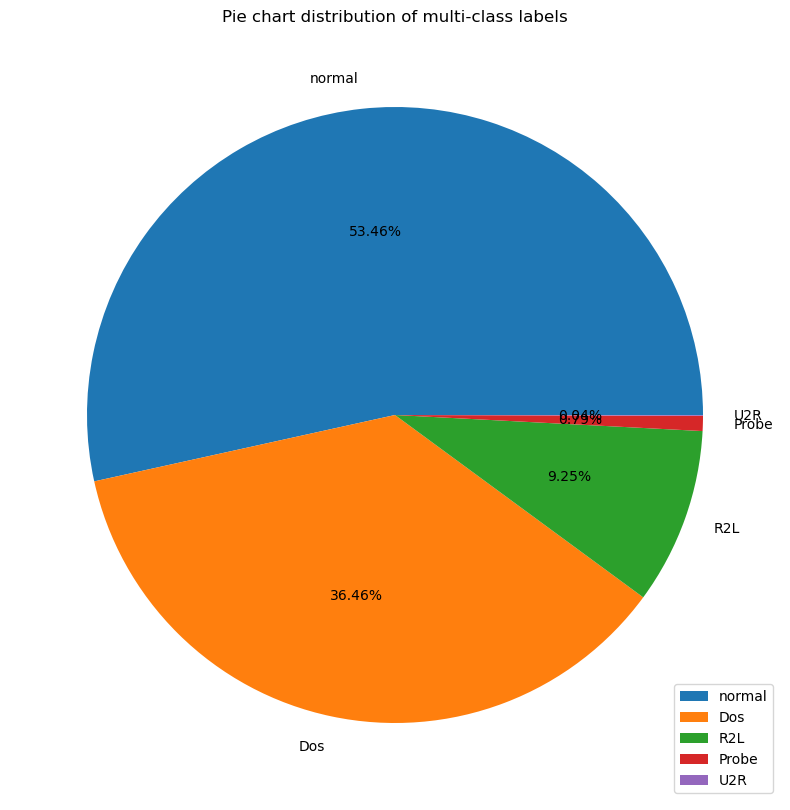

In [31]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(10,10))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('Pie_chart_multi.png')
plt.show()

# Feature Extraction

In [33]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

C:\Users\p c\AppData\Local\Temp\ipykernel_2948\2873760033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [72]:
numeric_multi

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,0,0,0,0,0,0,0,1,0
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,0
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,0,0,0,0,0,0,0,1,0
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,0,0,0,0,0,0,0,1,0
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [35]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

The code selects a subset of columns from a pandas dataframe multi_data containing only the attributes that were found to be highly correlated with the target variable using Pearson correlation coefficient.

Here's how the code works:

The list of column names to be selected is created and assigned to a new dataframe numeric_multi.
The column names in the list correspond to the columns in the multi_data dataframe that were found to have high correlation with the target variable using Pearson correlation coefficient.
The resulting numeric_multi dataframe contains only the selected columns.

In [36]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [37]:
# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


# Auto Encoder Classifier (Multi-class Classification)

In [38]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [39]:

# dataset excluding target attribute (encoded, one-hot-encoded,original)
y_train = X_train[['Dos','normal','Probe','R2L','U2R']]

X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

#y_test = X_test['intrusion'] # target attribute
y_test = X_test[['Dos','normal','Probe','R2L','U2R']]

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

The code prepares the data for training and testing machine learning models by separating the target variable and removing unnecessary columns from the training and testing data.

Here's how the code works:

The target variable is separated from the training data using y_train = X_train[['Dos','normal','Probe','R2L','U2R']]. The resulting y_train dataframe contains only the target variable columns, which have already been one-hot encoded and label encoded.
The target variable is also separated from the testing data using y_test = X_test[['Dos','normal','Probe','R2L','U2R']]. The resulting y_test dataframe contains only the target variable columns, which have already been one-hot encoded and label encoded.
Unnecessary columns are removed from the training data using X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1). The resulting X_train dataframe contains only the feature columns that will be used for training machine learning models.
Unnecessary columns are also removed from the testing data using X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1). The resulting X_test dataframe contains only the feature columns that will be used for testing machine learning models.

In [40]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [41]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [42]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)
     

The code defines a simple neural network architecture using the Keras API for deep learning. This architecture consists of one input layer, one encoding layer, and one output layer. The input and output layers have the same number of neurons as the number of features in the training data, while the encoding layer has a smaller number of neurons (in this case, 50).

Here's how the code works:

The number of input features is determined using input_dim = X_train.shape[1]. The resulting input_dim variable stores the number of features in the training data.
The number of neurons in the encoding layer is set to 50 using encoding_dim = 50.
An input layer is defined using input_layer = Input(shape=(input_dim, )). This layer will take the feature data as input to the neural network.
An encoding layer is defined using encoder = Dense(encoding_dim, activation="relu")(input_layer). This layer contains 50 neurons and uses the ReLU activation function. It takes the input from the input layer and applies a linear transformation to it.
An output layer is defined using output_layer = Dense(input_dim, activation='softmax')(encoder). This layer contains the same number of neurons as the input layer and uses the softmax activation function. It takes the output from the encoding layer and maps it back to the same dimension as the input layer.

In [43]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
     

This code creates an autoencoder model using the Keras API for deep learning. An autoencoder is a type of neural network architecture that is used for unsupervised learning, specifically for feature extraction and dimensionality reduction.

Here's how the code works:

A Keras model is defined using autoencoder = Model(inputs=input_layer, outputs=output_layer). This model takes the input layer and output layer that were defined earlier and combines them into a single model.
The loss function for the model is defined using loss='mean_squared_error'. This loss function calculates the mean squared error between the predicted and actual output values. The goal of the model is to minimize this loss function during training.
An optimizer is specified using optimizer='adam'. The Adam optimizer is a popular optimization algorithm used for training neural networks. It adjusts the learning rate adaptively during training, making it more effective than traditional optimization algorithms like stochastic gradient descent.
The metrics used for evaluating the performance of the model are specified using metrics=['accuracy']. In this case, the accuracy metric is used to evaluate how well the model is able to reconstruct the input data during training.
The model is then compiled using autoencoder.compile(), which sets all the parameters of the model, including the loss function, optimizer, and metrics.

In [44]:
# summary of model layers
autoencoder.summary()
     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


InputLayer: This layer represents the input to the autoencoder. It expects input data with a shape of (None, 93), where None indicates that the number of samples can vary and 93 is the number of input features.

Dense Layer (Encoder): This layer is named "dense" and acts as the encoder. It takes the input from the previous layer and applies a linear transformation, followed by an activation function. The output shape of this layer is (None, 50), indicating that it reduces the dimensionality of the input data to 50 features. The number of parameters in this layer is 4,700.

Dense Layer (Decoder): This layer is named "dense_1" and serves as the decoder. It takes the output of the encoder layer and applies another linear transformation, followed by an activation function. The output shape of this layer is the same as the input shape, (None, 93), indicating that it reconstructs the original input data. The number of parameters in this layer is 4,743.

The summary also provides information about the total trainable parameters in the model, which is 9,443. These are the parameters that will be updated during the training process to optimize the autoencoder's performance. There are no non-trainable parameters in this model, meaning that all parameters are trainable.

Overall, this autoencoder model aims to learn a compressed representation of the input data using an encoder, and then reconstruct the original input using a decoder. The model has been compiled and is ready for training or inference.

In [45]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.1746 - val_loss: 0.1061 - val_accuracy: 0.3871
Epoch 2/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.6147 - val_loss: 0.1050 - val_accuracy: 0.7298
Epoch 3/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.6852 - val_loss: 0.1048 - val_accuracy: 0.6952
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.7236 - val_loss: 0.1047 - val_accuracy: 0.7490
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.7510 - val_loss: 0.1047 - val_accuracy: 0.7858
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.7697 - val_loss: 0.1047 - val_accuracy: 0.7502
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.7791 - val_loss: 0.1046 - val_accuracy: 0.7743

Epoch 58/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8941 - val_loss: 0.1044 - val_accuracy: 0.8874
Epoch 59/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8964 - val_loss: 0.1044 - val_accuracy: 0.8771
Epoch 60/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8944 - val_loss: 0.1044 - val_accuracy: 0.8772
Epoch 61/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8969 - val_loss: 0.1044 - val_accuracy: 0.9131
Epoch 62/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8966 - val_loss: 0.1044 - val_accuracy: 0.8865
Epoch 63/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8969 - val_loss: 0.1044 - val_accuracy: 0.8817
Epoch 64/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1042 - accuracy: 0.8979 - val_loss: 0.1044 - val_accuracy:

In [46]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

This code is compiling an autoencoder model defined earlier using the Keras API for deep learning.

Here's what each argument does:

optimizer='adam': This specifies the optimizer to use for training the model. In this case, it's the Adam optimizer, which is a popular optimization algorithm used for training neural networks. It adjusts the learning rate adaptively during training, making it more effective than traditional optimization algorithms like stochastic gradient descent.
loss='mean_squared_error': This specifies the loss function to use during training. The mean squared error (MSE) loss function calculates the mean of the squared differences between the predicted and actual output values. The goal of the model is to minimize this loss function during training.
metrics=['accuracy']: This specifies the evaluation metric(s) to use for evaluating the performance of the model. In this case, it's accuracy, which is a commonly used metric for classification tasks. It calculates the percentage of correctly predicted labels.

In [47]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 2s 1ms/step - loss: 0.1044 - accuracy: 0.9124
Test results - Loss: 0.10443014651536942 - Accuracy: 91.23642444610596%


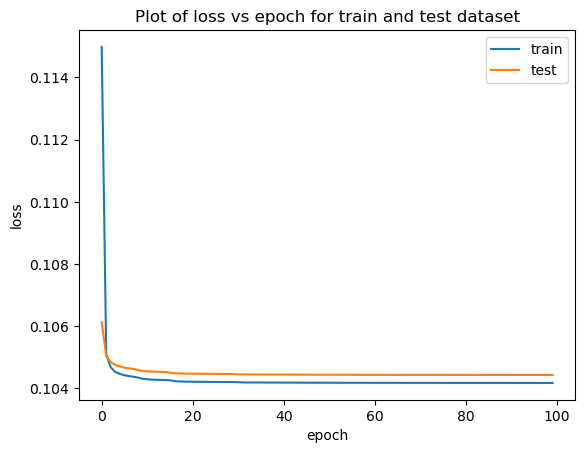

In [48]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ae_multi_loss.png')
plt.show()
     

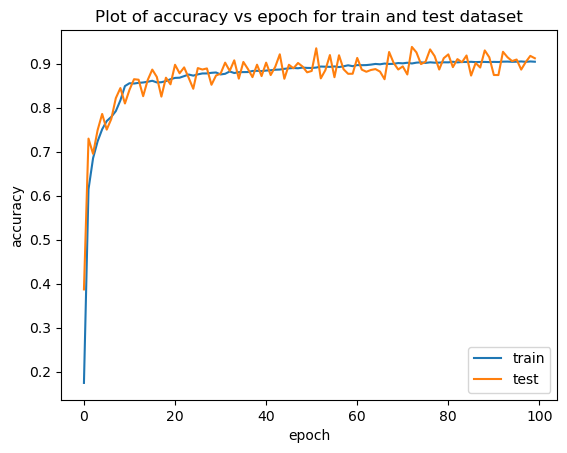

In [49]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('ae_multi_accuracy.png')
plt.show()

In [57]:
# representation of model layers
plot_model(autoencoder, to_file='ae_multi.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

985/985 [==============================] - 1s 1ms/step


# AE Classifier

In [53]:
i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 48 neurons
fvector = Dense(48, activation="sigmoid")(i_layer)   
#fvector = Dense(24, activation='tanh')(fvector)                 
#doutput layer
o_layer = Dense(5, activation='sigmoid')(fvector)

This code defines a neural network model using the Keras API for deep learning. The model has three layers:

Input layer: This is the input layer of the neural network that takes in the predictions generated by the previously trained autoencoder.
Dense layer with 48 neurons: This is the hidden layer of the neural network that takes in the input layer's output and applies the sigmoid activation function to produce a set of feature vectors.
Dense output layer: This is the output layer of the neural network that takes in the feature vectors from the hidden layer and produces the final output. The output layer has 5 neurons, corresponding to the 5 different intrusion classes.
Here's what each argument does:

shape=(i_dim, ): This specifies the shape of the input layer. In this case, it takes in a vector of length i_dim.
activation="sigmoid": This specifies the activation function to use in the hidden layer. In this case, it's the sigmoid activation function, which squashes the output between 0 and 1.
activation='sigmoid': This specifies the activation function to use in the output layer. In this case, it's also the sigmoid activation function since we are performing multi-label classification, and the output must be between 0 and 1.
The model takes the predictions generated by the autoencoder as input and produces the predicted intrusion classes as output

In [54]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

This code defines and compiles a neural network model for the purpose of classification using the output from an autoencoder as input.

The model takes an input layer with a shape equal to the number of columns in predictions, which is the output from an autoencoder. Then, there is a hidden layer with 48 neurons and a sigmoid activation function. Finally, there is an output layer with 5 neurons, one for each possible class label, and a sigmoid activation function.

The compiled model uses the Adam optimizer and the mean squared error loss function with accuracy as a metric.

In [55]:
ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_2 (Dense)             (None, 48)                4512      
                                                                 
 dense_3 (Dense)             (None, 5)                 245       
                                                                 
Total params: 4,757
Trainable params: 4,757
Non-trainable params: 0
_________________________________________________________________


The summary() method provides an overview of the model architecture, including the number of layers, output shapes, and the number of trainable parameters in the network.

In this case, the ae_classifier model has two layers. The first layer is an input layer with a shape of (None, 93), where None indicates that the model can accept any number of instances in the batch and 93 is the number of columns in the input data. The second layer is a dense layer with 48 neurons, which takes the input from the input layer and applies a sigmoid activation function. The output shape of this layer is (None, 48). The last layer is also a dense layer with 5 neurons, corresponding to the number of classes in the target variable, and it uses a sigmoid activation function. The output shape of this layer is (None, 5).

The Param # column shows the number of trainable parameters in each layer. For example, the input layer has no trainable parameters because it only serves as a placeholder for the input data. The dense layer with 48 neurons has 4512 trainable parameters, which is equal to the number of input features multiplied by the number of neurons in the layer plus the number of biases. The output layer has 245 trainable parameters, which is equal to the number of neurons in the previous layer plus the number of biases.

In total, the ae_classifier model has 4,757 trainable parameters.

In [56]:
# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=200,batch_size=700, validation_split=0.2).history

Epoch 1/200
36/36 [==============================] - 1s 8ms/step - loss: 0.1650 - accuracy: 0.5323 - val_loss: 0.1375 - val_accuracy: 0.5321
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.5327 - val_loss: 0.1191 - val_accuracy: 0.5321
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.5327 - val_loss: 0.1104 - val_accuracy: 0.5321
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.5327 - val_loss: 0.1029 - val_accuracy: 0.5321
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.6971 - val_loss: 0.0946 - val_accuracy: 0.8246
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.8297 - val_loss: 0.0856 - val_accuracy: 0.8405
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.0814 - accuracy: 0.8472 - val_loss: 0.0765 - val_accuracy: 0.8508
Epoch 8/200
3

Epoch 59/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9073 - val_loss: 0.0288 - val_accuracy: 0.9108
Epoch 60/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9073 - val_loss: 0.0287 - val_accuracy: 0.9117
Epoch 61/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9073 - val_loss: 0.0286 - val_accuracy: 0.9119
Epoch 62/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9078 - val_loss: 0.0286 - val_accuracy: 0.9127
Epoch 63/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9087 - val_loss: 0.0285 - val_accuracy: 0.9133
Epoch 64/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9090 - val_loss: 0.0284 - val_accuracy: 0.9133
Epoch 65/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9095 - val_loss: 0.0283 - val_accuracy: 0.9136
Epoch 

36/36 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9186 - val_loss: 0.0250 - val_accuracy: 0.9240
Epoch 174/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9186 - val_loss: 0.0250 - val_accuracy: 0.9241
Epoch 175/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9186 - val_loss: 0.0250 - val_accuracy: 0.9241
Epoch 176/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9186 - val_loss: 0.0250 - val_accuracy: 0.9240
Epoch 177/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9185 - val_loss: 0.0249 - val_accuracy: 0.9241
Epoch 178/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9186 - val_loss: 0.0249 - val_accuracy: 0.9240
Epoch 179/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9187 - val_loss: 0.0249 - val_accuracy: 0.9240
Epoch 180/200

In [59]:
# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Optimizer: The optimizer determines how the model's parameters will be updated during training in order to minimize the loss function. In this case, the optimizer is set to 'adam'. Adam is a popular optimization algorithm that combines the benefits of both AdaGrad and RMSProp. It adjusts the learning rate dynamically for each parameter, which can lead to faster convergence and better performance.

Loss function: The loss function is used to measure the discrepancy between the predicted output and the true target values. The choice of the loss function depends on the task and the nature of the data. In this case, the loss function is set to 'mean_squared_error', which calculates the mean squared difference between the predicted and true values. It is commonly used for regression tasks.

Metrics: Metrics are used to evaluate the performance of the model during training and testing. They provide additional information about the model's behavior beyond the loss value. In this case, the model's accuracy is being tracked as a metric. The accuracy metric measures the percentage of correctly classified samples. It is often used for classification tasks.

In [60]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
     

985/985 [==============================] - 2s 1ms/step - loss: 0.0551 - accuracy: 0.8890
Test results - Loss: 0.05506286770105362 - Accuracy: 88.8962984085083%


In [61]:
# representation of model layers
plot_model(ae_classifier, to_file='plots/ae_classifier_multi.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


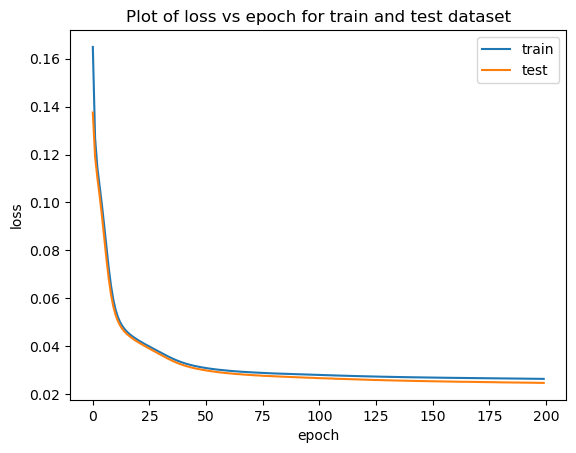

In [62]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ae_classifier_multi_loss.png')
plt.show()

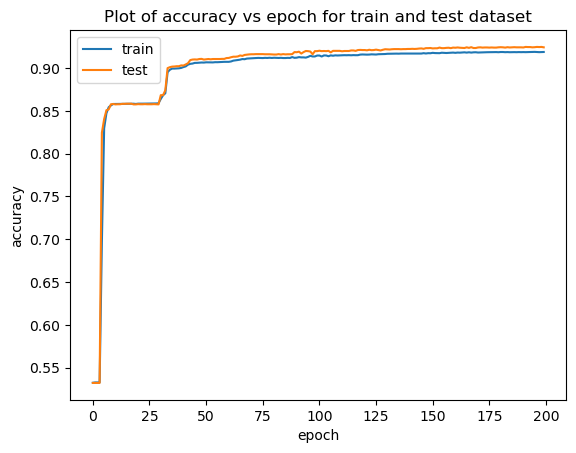

In [63]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('ae_classifier_multi_accuracy.png')
plt.show()

In [64]:
y_pred = ae_classifier.predict(X_test)

985/985 [==============================] - 1s 1ms/step


In [67]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))
     

This code is converting the predicted values in y_pred from float to integer by rounding off each value to the nearest integer. The code iterates over each element of y_pred, where j represents the column index and i represents the row index. For each element, the round() function is applied to convert the float value to the nearest integer, and the resulting integer value is stored back into the same element of y_pred.

In [68]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))
     

Recall Score -  0.9004254778688005
F1 Score -  0.8592031510377216
Precision Score -  0.8215899872522888
